# PH 245 Homework 2: Linear Regression
Kunal Mishra

In [39]:
#Loading Libraries
library(ggplot2)

# Loading Data
data = read.table(file="Data-HW2-Bodyfat.txt", header=FALSE)
colnames(data) = c('Case Number', "BroznekBF", 
                   "SiriBF", "Density", 
                   "Age", "Weight", "Height", "AdiposityIndex",
                   "FatFreeWeight", "NeckCirc", "ChestCirc",
                   "AbdomenCirc", "HipCirc", "ThighCirc",
                   "KneeCirc", "AnkleCirc", 
                   "ExtendedBicepsCirc", "ForearmCirc",
                   "WristCirc")

head(data)

Case Number,BroznekBF,SiriBF,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,NeckCirc,ChestCirc,AbdomenCirc,HipCirc,ThighCirc,KneeCirc,AnkleCirc,ExtendedBicepsCirc,ForearmCirc,WristCirc
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,26.5,167.0,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


#### Exploratory Data Analysis (EDA)

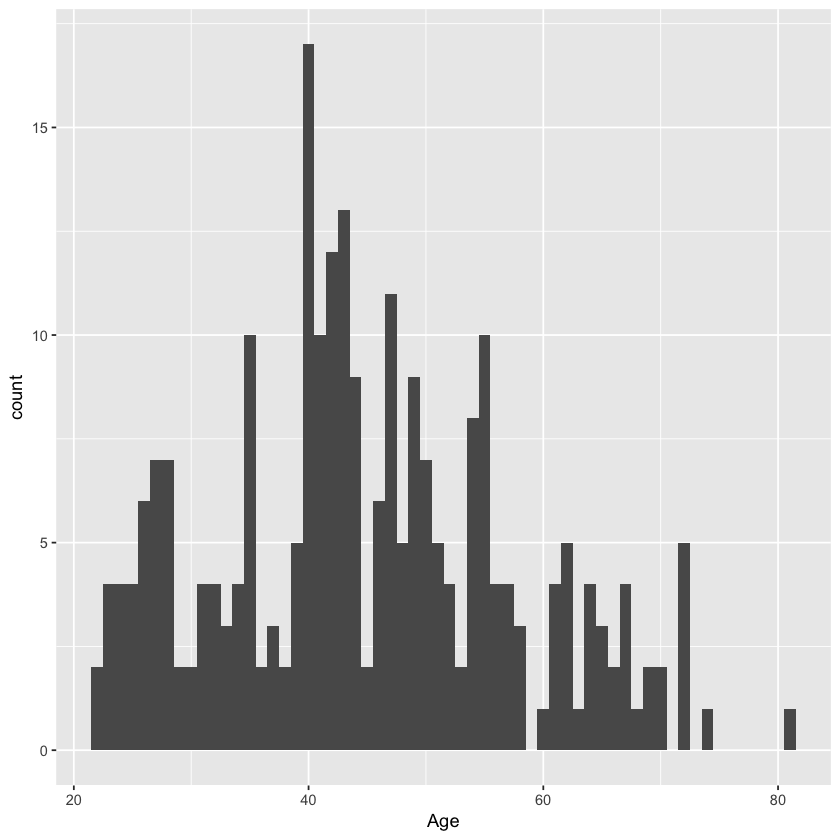

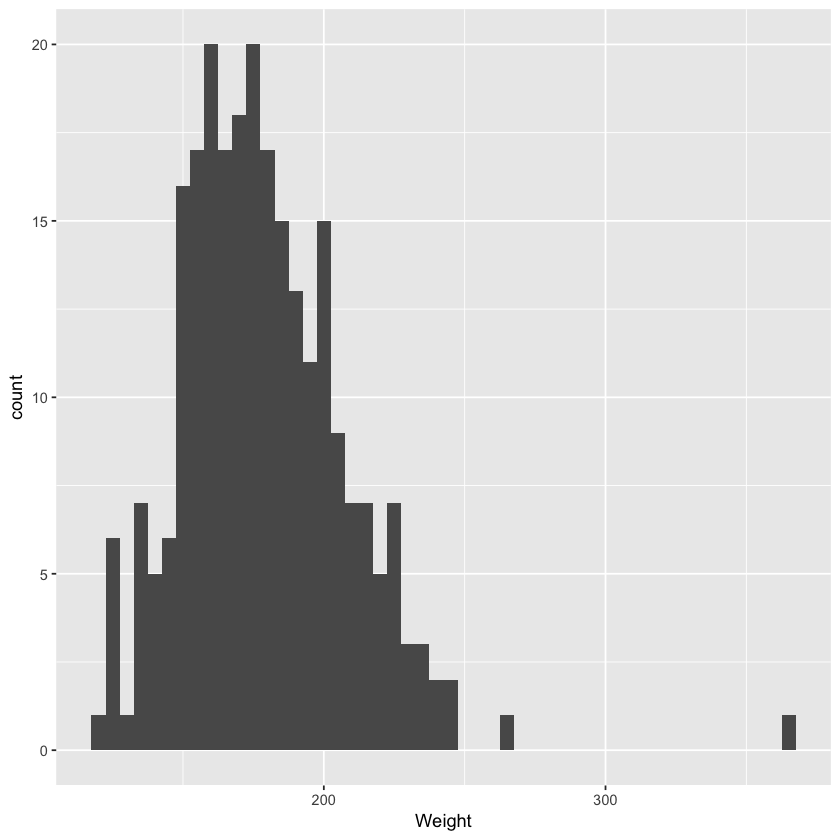

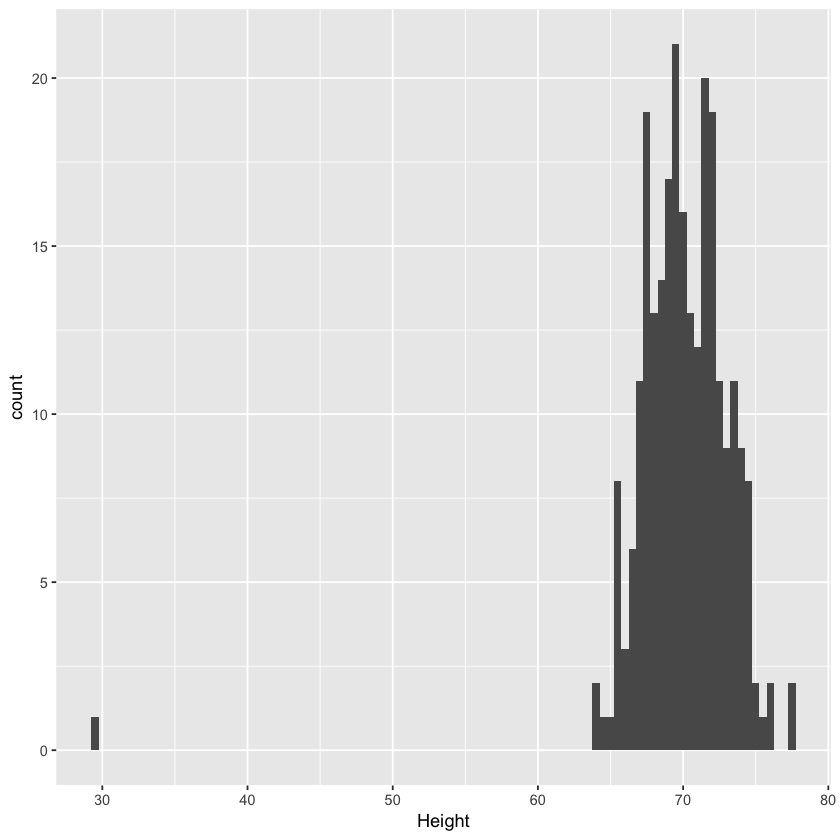

In [40]:
ggplot(data=data, aes(x = Age)) + geom_histogram(binwidth=1)
ggplot(data=data, aes(x = Weight)) + geom_histogram(binwidth=5)
ggplot(data=data, aes(x = Height)) + geom_histogram(binwidth=.5)

In [66]:
print(nrow(data))
cor(data)

[1] 252


,Case Number,BroznekBF,SiriBF,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,NeckCirc,ChestCirc,AbdomenCirc,HipCirc,ThighCirc,KneeCirc,AnkleCirc,ExtendedBicepsCirc,ForearmCirc,WristCirc
Case Number,1.000000000,0.11095086,0.11182544,-0.10960539,0.34125350,0.03372794,0.04094313,0.04771746,-0.04009261,0.07111233,0.1205148,0.12171973,-0.02373697,-0.08070819,0.04793870,-0.07064429,-0.01567689,0.001959724,0.08184538
BroznekBF,0.110950863,1.00000000,0.99974434,-0.98808673,0.28917352,0.61315611,-0.08910641,0.72799418,0.02013209,0.49148893,0.7028852,0.81370622,0.62569993,0.56128438,0.50778587,0.26678256,0.49303089,0.363277442,0.34757276
SiriBF,0.111825441,0.99974434,1.00000000,-0.98778240,0.29145844,0.61241400,-0.08949538,0.72748388,0.01937491,0.49059185,0.7026203,0.81343228,0.62520092,0.55960753,0.50866524,0.26596977,0.49327113,0.361386903,0.34657486
Density,-0.109605390,-0.98808673,-0.98778240,1.00000000,-0.27763721,-0.59406188,0.09788114,-0.71473204,-0.00574871,-0.47296636,-0.6825987,-0.79895463,-0.60933143,-0.55309098,-0.49504035,-0.26489003,-0.48710872,-0.351648418,-0.32571598
Age,0.341253503,0.28917352,0.29145844,-0.27763721,1.00000000,-0.01274609,-0.17164514,0.11885126,-0.23790534,0.11350519,0.1764497,0.23040942,-0.05033212,-0.20009576,0.01751569,-0.10505810,-0.04116212,-0.085055552,0.21353062
Weight,0.033727935,0.61315611,0.61241400,-0.59406188,-0.01274609,1.00000000,0.30827854,0.88735216,0.79219519,0.83071622,0.8941905,0.88799494,0.94088412,0.86869354,0.85316739,0.61368542,0.80041593,0.630301433,0.72977489
Height,0.040943134,-0.08910641,-0.08949538,0.09788114,-0.17164514,0.30827854,1.00000000,-0.02489094,0.48779841,0.25370988,0.1348918,0.08781291,0.17039426,0.14843561,0.28605321,0.26474369,0.20781557,0.228649220,0.32206533
AdiposityIndex,0.047717462,0.72799418,0.72748388,-0.71473204,0.11885126,0.88735216,-0.02489094,1.00000000,0.54719009,0.77785691,0.9117986,0.92388010,0.88326922,0.81270609,0.71365983,0.50031664,0.74638418,0.558594251,0.62590659
FatFreeWeight,-0.040092608,0.02013209,0.01937491,-0.00574871,-0.23790534,0.79219519,0.48779841,0.54719009,1.00000000,0.67911804,0.5929571,0.49565221,0.70348104,0.67668053,0.70362435,0.58294600,0.64929534,0.550277173,0.67335898
NeckCirc,0.071112330,0.49148893,0.49059185,-0.47296636,0.11350519,0.83071622,0.25370988,0.77785691,0.67911804,1.00000000,0.7848350,0.75407737,0.73495788,0.69569734,0.67240498,0.47789242,0.73114592,0.623660267,0.74482640


#### EDA Insights

As expected, the Case Number didn't correlated with anything (duh) and the two BF% equations correlated ridiculously with each other (duh) but some interesting correlations (or lack thereof) included:
- A very high correlation between Adiposity Index and BF%
- A very high negative correlation between Density and BF%
- A high correlation between Chest Circumference and BF%
- A lack of a correlation between Age and Weight (counterintuitive)
- A smaller than expected correlation between %BF and Weight (counterintuitive)
- A lack of a correlation between Fat Free Weight and %BF (expected)
- A surprisingly high correlations between Chest Circumference and Weight (interesting)
- A much smaller than expected correlation between %BF and Height (counterintuitive) 
- Weight seems to correlate highly with most of the circumferences 

Age, Weight, and Height all seem to be relatively normal distributions 

There are 252 total observations in the dataset.

In [55]:
# Problem 1A

# Our response variable (what we're predicting... 'y')
siriBF = data$SiriBF

# Our predictor variables
age = data[,5]
weight = data[,6]
height = data[,7]
circumferences = data[,10:19]
predictors = cbind(age, weight, height, circumferences)

# Our entire relevant dataset - response + predictors
fittingData = cbind(siriBF, predictors)

# Eliminating outliers
fittingDataNoOutliers = fittingData[-c(seq(1, nrow(fittingData))[fittingData$weight > 300],
                                      seq(1, nrow(fittingData))[fittingData$height < 40]
                                     ),]

stopifnot(nrow(fittingDataNoOutliers) == nrow(fittingData) - 2)

# Fitting Data (excluding outliers)
fit = lm(formula=siriBF~., data=fittingDataNoOutliers)
summary(fit)


Call:
lm(formula = siriBF ~ ., data = fittingDataNoOutliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9900  -3.1244  -0.1674   3.0248   9.8648 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.68516   23.37412   0.072 0.942587    
age                 0.07189    0.03217   2.234 0.026389 *  
weight             -0.01762    0.06714  -0.263 0.793153    
height             -0.24675    0.19114  -1.291 0.197989    
NeckCirc           -0.38682    0.23486  -1.647 0.100887    
ChestCirc          -0.11919    0.10825  -1.101 0.272004    
AbdomenCirc         0.90452    0.09140   9.897  < 2e-16 ***
HipCirc            -0.15878    0.14586  -1.089 0.277446    
ThighCirc           0.17299    0.14683   1.178 0.239926    
KneeCirc           -0.04580    0.24560  -0.186 0.852230    
AnkleCirc           0.18502    0.21985   0.842 0.400862    
ExtendedBicepsCirc  0.17968    0.17039   1.054 0.292732    
ForearmCirc         0.27605    0.20692 

#### Problem 1B

- Resource: Interpreting linear model fit summaries - https://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R

- Age Coefficient Estimate: .07189
- Interpretation: For every increase in age by 1 year, there is a .07189 increase in observed body fat% via Siri's equation.
- P-Value: .026389
- Hypothesis Test with alpha=.05: We would *reject* our null hypothesis that the coefficient estimate of age is 0 

#### Problem 1C

- Abdomen Circumference Coefficient Estimate: 0.90452
- Interpretation: For every increase in Abdomen Circumference by 1 centimeter, there is a 0.90452 increase in observed body fat% via Siri's equation.
- P-Value: ~0
- Hypothesis Test with alpha=.05: We would *reject* our null hypothesis that the coefficient estimate of Abdomen Cicumference is 0

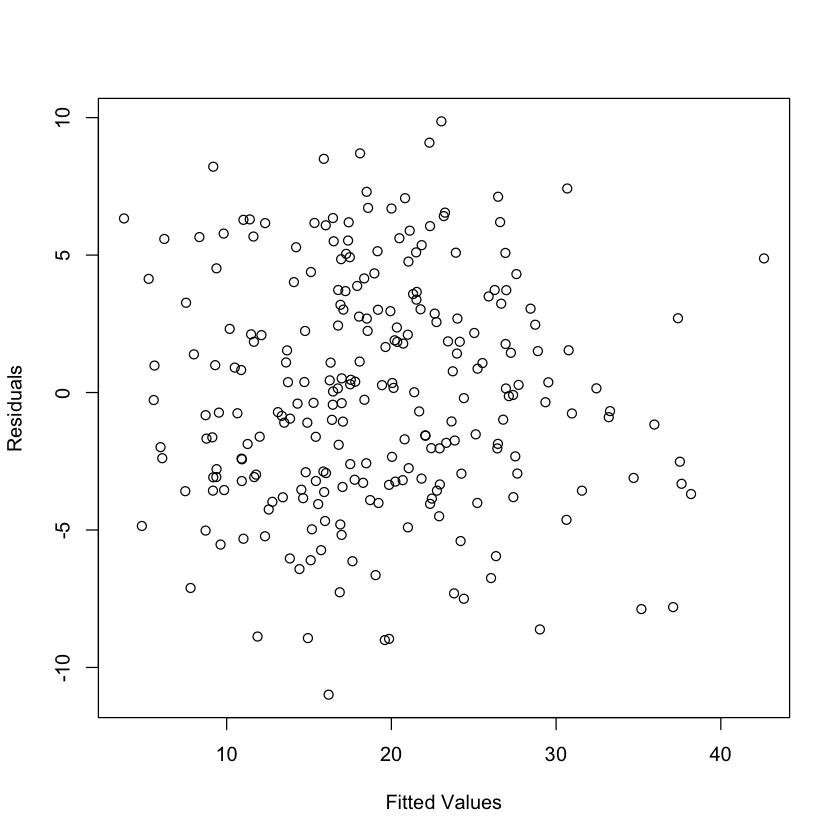

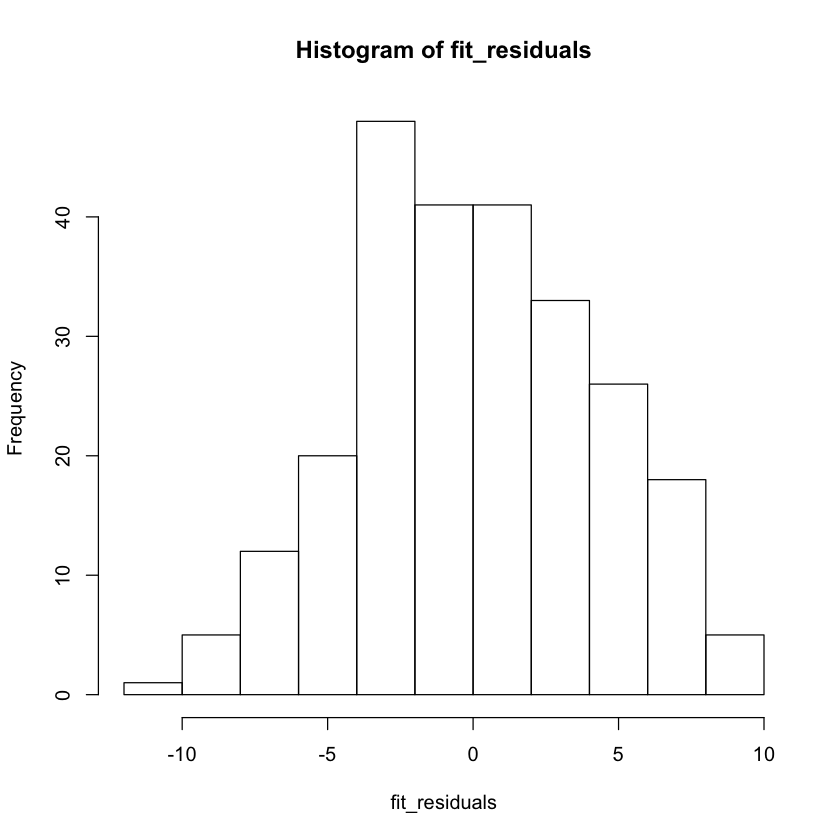

In [65]:
# Problem 1D

fit_values = fitted.values(fit)
fit_residuals = residuals(fit)
plot(x=fit_values, y=fit_residuals, xlab='Fitted Values', ylab='Residuals')
hist(fit_residuals)

#### Problem 1D (continued)

The residual plot appears to be okay -- there seems to be a fairly random dispersion of points around the line y=0. There doesn't seem to be any sort of u shape indicating bias. 

**Key Assumptions:** http://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
- There must be linear relationships between our response and predictor variables
- Residuals should be normally distributed - The histogram indicates something reasonably close to a normal distribution around 0, indicating errors between observed and predicted values are normally distributed.
- There is no multicollinearity (this we looked at in EDA) -- this appears to have been violated as weight is heavily correlated with many of the circumferences (correlation > .8) and many of the circumferences seem to be fairly correlated with each other (i.e. hip and thigh)
- Homoscedasticity (uniform variance around the regression line across values of the fitted values) - this looks about right, there doesn't seem to be any sort of variance in residual magnitude across fitted values and around the line y=0. There also doesn't seem to be any bias in the shape of a u form in the residuals. 

#### Problem 1E

In the class model that was fitted using only three predictor variables (age, weight, and height) all 4 terms were measured as being statistically signficant predictors of bf%. This stands in contrast to our full model which only found Age, Abdomen Circumference, and Wrist Circumference to be statistically significant predictors of bf%. I hypothesize this is due to *the overall number* of predictor variables -- simply put, with different-sized models, the "weight" (coefficient estimate) of any given predictor variable is likely to change because its contribution to the overall prediction grows smaller with larger numbers of predictors and vice-versa. 

It's interesting that weight has the smallest p-value in the smaller class model but is among the least significant predictors in the full model. Maybe this is due to weight being highly correlated with many of the circumference values that we added into the model? When we add these to the model, the predictive value of weight specifically may fade as it was capturing the essence of the circumferences in the class model but no longer does this in the full model. 

In terms of ajdusted $R^{2}$, this statistic provides a measure of how well the model is fitting the actual data. The ajdusted $R^{2}$ helps to explain how much of the variance in our response variable is due to our predictor variables and thus it is apparent that our class model captures less of the variance (as expected) than our more full-featured model.  